In [1]:
from fastai.vision import *
import pandas as pd
import os

In [4]:
os.chdir(r'D:\Datasets\apparel_ds')
path1 = Path('')
path1.ls()

[WindowsPath('export.pkl'),
 WindowsPath('models'),
 WindowsPath('test'),
 WindowsPath('test.csv'),
 WindowsPath('train'),
 WindowsPath('train.csv')]

In [5]:
test = pd.read_csv(r'D:\Datasets\apparel_ds\test.csv')
train = pd.read_csv(r'D:\Datasets\apparel_ds\train.csv')
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


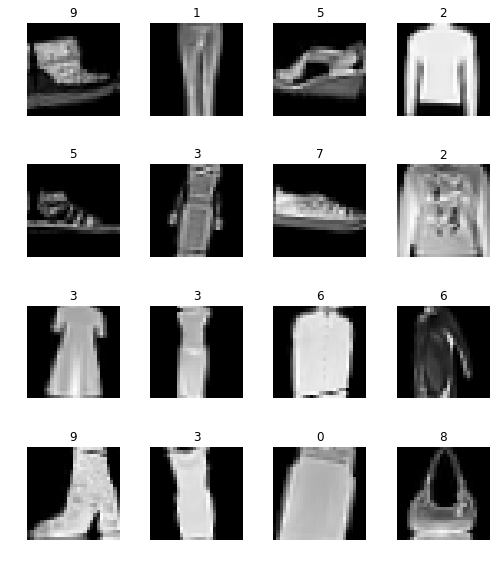

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path = r'D:\Datasets\apparel_ds', folder = 'train', csv_labels = 'train.csv', valid_pct=0.2, suffix = '.png',ds_tfms=get_transforms(), size=28, num_workers=0).normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(7,8))

In [43]:
data.classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\prana/.torch\models\resnet50-19c8e357.pth
100%|████████████████████████████████████████████████████████████████| 102502400/102502400 [05:01<00:00, 340184.11it/s]


In [49]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.506066,0.436264,0.851000,05:13
1,0.433351,0.334518,0.872333,06:40
2,0.348944,0.290034,0.893750,06:37
3,0.295812,0.244652,0.911583,06:25
4,0.250753,0.217590,0.921000,06:50
5,0.217617,0.205410,0.924500,06:32


In [51]:
learn.save('stage-50.6')

In [52]:
learn.unfreeze()

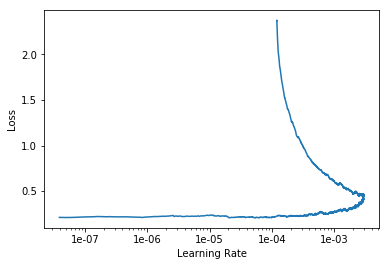

In [53]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.524423,0.427354,0.843500,03:09
1,0.481932,0.413940,0.845083,03:49


In [54]:
learn.export()

In [55]:
defaults.device = torch.device('cuda')

In [41]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

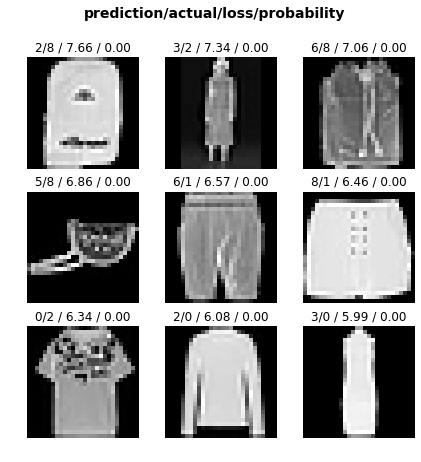

In [42]:
interp.plot_top_losses(9, figsize=(7,7))

In [32]:
os.chdir('./test')
os.getcwd()

'D:\\Datasets\\apparel_ds\\test'

In [34]:
test_img = os.listdir()
len(test_img)

10000

In [36]:
from tqdm import tqdm

In [56]:
results = []
for img in tqdm(test_img):
    img_test = open_image(img)
    pred_class,pred_idx,outputs = learn.predict(img_test)
    results.append(int(pred_class))

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:05<00:00, 32.75it/s]


In [57]:
results[0:5]

[9, 2, 1, 1, 6]

In [39]:
test['label'] = results
test.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [59]:
test.to_csv(r'C:\Users\prana\Desktop\devOPS\apparel_fastai1.csv',index_label=False)